In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示

import seaborn as sns
sns.set(style="whitegrid",palette="muted", color_codes=True)

#为了在jupyter notebook里作图，需要用到这个命令
%matplotlib inline   

from sqlalchemy import create_engine
from urllib import quote_plus as urlquote

import traceback
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',1000)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# 开思平台生产库
password = "Casstime@0719"
engine = create_engine('mysql+pymysql://ximu:%s@cassec-demo.mysql.rds.aliyuncs.com:3306/ec_admin'%urlquote(password))

# 开思金融数据库
password2 = "Casstime@com1112"
engine2 = create_engine('mysql+pymysql://reader:%s@172.21.21.78:3306/kscredit'%urlquote(password2))

def get_sql(sql,engine):
    df = pd.read_sql(sql=sql,con = engine)
    print df.shape
    print df.columns
    return df

In [11]:
sql = '''
SELECT t1.`COMPANY_ID`
      ,t1.`ORDER_ID`
      ,DATE(t1.created_stamp) AS date
      ,DATE_FORMAT(t1.created_stamp,'%%Y-%%m') as yymm
      ,MONTH(DATE(t1.created_stamp)) as month
      ,YEAR(DATE(t1.created_stamp)) as year
      ,sum(t2.`ACTUAL_CURRENCY_AMOUNT`) as amount
FROM ofbiz.order_header t1
JOIN ofbiz.order_payment t2
ON t1.ORDER_ID = t2.ORDER_ID
JOIN ec_admin.PARTY_GROUP_GEO t3
ON t1.company_id = t3.party_id
LEFT JOIN ec_admin.party_group t4
ON t1.company_id = t4.id
WHERE t2.actual_currency_amount >= 0.01
AND t2.actual_currency_amount<=6000000
AND t1.company_id NOT IN ("ZDQL7blRgcYkehvzLJx","qV80ZU26BkEvQCjNeyG","PQVDbTECtqtL9RU3LM1","ojqQZRmNiaXqwaxQpnL",
"lKe1gf5KsQF2Qvr7lqa","k48dr6BDLfB1kk65HZl","4UT4HuPaG2MZPa440GU")
AND t1.product_store_id NOT IN ("XMHYSX01","TSJWL001","GZCDSX01","GZBSSX01","GZLRH001")
AND t1.created_stamp >= "2018-01-01"
AND t1.created_stamp <= "2019-12-31"
AND t1.status_id IN ("ORDER_APPROVED","ORDER_COMPLETED") 
group by t1.`COMPANY_ID`
,t1.`ORDER_ID`
,DATE(t1.created_stamp)
,DATE_FORMAT(t1.created_stamp,'%%Y-%%m')
,MONTH(DATE(t1.created_stamp))
,YEAR(DATE(t1.created_stamp)) 
'''
order = get_sql(sql,engine)

InternalError: (pymysql.err.InternalError) (2801, u'ip not in whitelist, client ip is 10.118.72.235')
(Background on this error at: http://sqlalche.me/e/2j85)

In [86]:
del order['tag']
order['tag'] = order['amount'].apply(lambda x: '0-1000' if x <= 1000 else
                                                '1000-10000' if x <= 10000 else 
                                                '10000以上')
order 

COMPANY_ID        ORDER_ID        date     yymm  month  \
0        005cn10dakWDE8jO4Ii  S1905130001865  2019-05-13  2019-05      5   
1        007IOQO2XAgYAb8bSK6  S1811300039141  2018-11-30  2018-11     11   
2        007IOQO2XAgYAb8bSK6  S1812270001565  2018-12-27  2018-12     12   
3        007IOQO2XAgYAb8bSK6  S1812270001588  2018-12-27  2018-12     12   
4        007IOQO2XAgYAb8bSK6  S1812270001611  2018-12-27  2018-12     12   
5        007IOQO2XAgYAb8bSK6  S1812270001627  2018-12-27  2018-12     12   
6        007IOQO2XAgYAb8bSK6  S1812270001777  2018-12-27  2018-12     12   
7        007IOQO2XAgYAb8bSK6  S1812270001874  2018-12-27  2018-12     12   
8        007IOQO2XAgYAb8bSK6  S1812270002036  2018-12-27  2018-12     12   
9        007IOQO2XAgYAb8bSK6  S1812270002152  2018-12-27  2018-12     12   
10       007IOQO2XAgYAb8bSK6  S1812270002198  2018-12-27  2018-12     12   
11       007IOQO2XAgYAb8bSK6  S1812270002272  2018-12-27  2018-12     12   
12       007IOQO2XAgYAb8bSK6  S1812270006328  2018-12-27  2018-12     12   
13       007IOQO2XAgYAb8bSK6  S1812270007733  2018-12-27  2018-12     12   
14       007IOQO2XAgYAb8bSK6  S1812280001566  2018-12-28  2018-12     12   
15       007IOQO2XAgYAb8bSK6  S1812280001780  2018-12-28  2018-12     12   
16       007IOQO2XAgYAb8bSK6  S1901020001074  2019-01-02  2019-01      1   
17       007IOQO2XAgYAb8bSK6  S1901020001344  2019-01-02  2019-01      1   
18       007IOQO2XAgYAb8bSK6  S1901050000100  2019-01-05  2019-01      1   
19       007IOQO2XAgYAb8bSK6  S1901050001031  2019-01-05  2019-01      1   
20       007IOQO2XAgYAb8bSK6  S1901100006703  2019-01-10  2019-01      1   
21       007IOQO2XAgYAb8bSK6  S1901110007630  2019-01-11  2019-01      1   
22       007IOQO2XAgYAb8bSK6  S1901120004224  2019-01-12  2019-01      1   
23       007IOQO2XAgYAb8bSK6  S1901140003851  2019-01-14  2019-01      1   
24       007IOQO2XAgYAb8bSK6  S1901160000058  2019-01-16  2019-01      1   
25       007IOQO2XAgYAb8bSK6  S1901160000589  2019-01-16  2019-01      1   
26       007IOQO2XAgYAb8bSK6  S1901160000705  2019-01-16  2019-01      1   
27       007IOQO2XAgYAb8bSK6  S1901160000735  2019-01-16  2019-01      1   
28       007IOQO2XAgYAb8bSK6  S1905170003483  2019-05-17  2019-05      5   
29       007IOQO2XAgYAb8bSK6  S1905250000810  2019-05-25  2019-05      5   
30       007IOQO2XAgYAb8bSK6  S1906130003009  2019-06-13  2019-06      6   
31       00DUvW5UNUmiHGVLG6z  S1907200002060  2019-07-20  2019-07      7   
32       00DUvW5UNUmiHGVLG6z  S1907200002477  2019-07-20  2019-07      7   
33       00DUvW5UNUmiHGVLG6z  S1907200002639  2019-07-20  2019-07      7   
34       00DUvW5UNUmiHGVLG6z  S1907210000607  2019-07-21  2019-07      7   
35       00DUvW5UNUmiHGVLG6z  S1907210001212  2019-07-21  2019-07      7   
36       00DUvW5UNUmiHGVLG6z  S1907210001288  2019-07-21  2019-07      7   
37       00DUvW5UNUmiHGVLG6z  S1907210001555  2019-07-21  2019-07      7   
38       00DUvW5UNUmiHGVLG6z  S1907230002067  2019-07-23  2019-07      7   
39       00DUvW5UNUmiHGVLG6z  S1908040001953  2019-08-04  2019-08      8   
40       00DUvW5UNUmiHGVLG6z  S1908040002325  2019-08-04  2019-08      8   
41       00DUvW5UNUmiHGVLG6z  S1908060002165  2019-08-06  2019-08      8   
42       00DUvW5UNUmiHGVLG6z  S1908060002498  2019-08-06  2019-08      8   
43       00DUvW5UNUmiHGVLG6z  S1908080001873  2019-08-08  2019-08      8   
44       00DUvW5UNUmiHGVLG6z  S1908130001781  2019-08-13  2019-08      8   
45       00DUvW5UNUmiHGVLG6z  S1908140000544  2019-08-14  2019-08      8   
46       00DUvW5UNUmiHGVLG6z  S1908140003315  2019-08-14  2019-08      8   
47       00DUvW5UNUmiHGVLG6z  S1908150000371  2019-08-15  2019-08      8   
48       00DUvW5UNUmiHGVLG6z  S1908170000271  2019-08-17  2019-08      8   
49       00DUvW5UNUmiHGVLG6z  S1908170000607  2019-08-17  2019-08      8   
50       00DUvW5UNUmiHGVLG6z  S1908170000679  2019-08-17  2019-08      8   
51       00DUvW5UNUmiHGVLG6z  S1908170002030  2019-08-17  2019-08 

## 单笔订单金额分布

In [87]:
order.sort_values(by=['amount'],ascending=False)

COMPANY_ID        ORDER_ID        date     yymm  month  \
997279   fjx8wLTAcp16fOZQDjB  S1909110000065  2019-09-11  2019-09      9   
1647670  ViGftu3Mo7vYTLb5TuR  S1906130002204  2019-06-13  2019-06      6   
661747   4qGqb5CexgTzo4Xkh2r  S1910120002481  2019-10-12  2019-10     10   
879112   CGorGnh5EN9sDdy0Go7  S1905290000398  2019-05-29  2019-05      5   
661763   4qGqb5CexgTzo4Xkh2r  S1911200002858  2019-11-20  2019-11     11   
1647669  ViGftu3Mo7vYTLb5TuR  S1905280000652  2019-05-28  2019-05      5   
1638462  VeHBBneUMiX4YkHLXaJ  S1909150003426  2019-09-15  2019-09      9   
1647673  ViGftu3Mo7vYTLb5TuR  S1907300002618  2019-07-30  2019-07      7   
994231   FhDhcYemOS3iY9OSy05  S1907160003600  2019-07-16  2019-07      7   
718396   6v94uVlPZbFGWHegZJV  S1801270000073  2018-01-27  2018-01      1   
879061   CGorGnh5EN9sDdy0Go7  S1812210005603  2018-12-21  2018-12     12   
814999   aTsC3l0eXEGXeqCLtBi  S1906300002710  2019-06-30  2019-06      6   
718391   6v94uVlPZbFGWHegZJV  S1801260040215  2018-01-26  2018-01      1   
718405   6v94uVlPZbFGWHegZJV  S1802030041423  2018-02-03  2018-02      2   
1693529  WuWwVTkdJEoMR0gHlef  S1911200004684  2019-11-20  2019-11     11   
613789   2tskcmbh1aJaNdVysb1  S1909190002656  2019-09-19  2019-09      9   
613725   2tskcmbh1aJaNdVysb1  S1908310005669  2019-08-31  2019-08      8   
1627827  uXeHeD5d3uibXRwA79W  S1909150005973  2019-09-15  2019-09      9   
1638460  VeHBBneUMiX4YkHLXaJ  S1909120005339  2019-09-12  2019-09      9   
940462   Dyw7ImHJFVJFYzTeWcj  S1908310001158  2019-08-31  2019-08      8   
1367445  o73E442MC7xovX6WADD  S1910300006303  2019-10-30  2019-10     10   
702838   6g5KvQtavpnt9bLVdt1  S1907300002890  2019-07-30  2019-07      7   
1647672  ViGftu3Mo7vYTLb5TuR  S1907050002530  2019-07-05  2019-07      7   
718401   6v94uVlPZbFGWHegZJV  S1802030003012  2018-02-03  2018-02      2   
964081   EJXfnOsHLO3hfB4Jp0k  S1908190004491  2019-08-19  2019-08      8   
1647674  ViGftu3Mo7vYTLb5TuR  S1909190006311  2019-09-19  2019-09      9   
1647676  ViGftu3Mo7vYTLb5TuR  S1909230002369  2019-09-23  2019-09      9   
879111   CGorGnh5EN9sDdy0Go7  S1904300002985  2019-04-30  2019-04      4   
879109   CGorGnh5EN9sDdy0Go7  S1904290004454  2019-04-29  2019-04      4   
522513                 19093  S1803010031618  2018-03-01  2018-03      3   
1525809  SbfwXBYQsv20JOziDoe  S1909260006454  2019-09-26  2019-09      9   
718410   6v94uVlPZbFGWHegZJV  S1802030089410  2018-02-03  2018-02      2   
1740306  xvlQd047KPKsESpET5R  S1910310006368  2019-10-31  2019-10     10   
1697916  WXpDfuI79WhhyMJCrIt  S1907290005778  2019-07-29  2019-07      7   
680464   5hew4dCowq3I4W9zXry  S1910140005884  2019-10-14  2019-10     10   
680463   5hew4dCowq3I4W9zXry  S1910120002388  2019-10-12  2019-10     10   
1240209  kxsFGJaPpsY8Nf1nOBQ  S1908240005728  2019-08-24  2019-08      8   
500592                 18859  S1909180001924  2019-09-18  2019-09      9   
1099894  hRxAysQVXWX9Zoj3AuS  S1907030002486  2019-07-03  2019-07      7   
500356                 18859  S1801020094668  2018-01-02  2018-01      1   
718402   6v94uVlPZbFGWHegZJV  S1802030011179  2018-02-03  2018-02      2   
680459   5hew4dCowq3I4W9zXry  S1909290004774  2019-09-29  2019-09      9   
1515742  RxZslhgjPW5B4cfdO05  S1909230003411  2019-09-23  2019-09      9   
718425   6v94uVlPZbFGWHegZJV  S1803220092873  2018-03-22  2018-03      3   
680466   5hew4dCowq3I4W9zXry  S1910170003688  2019-10-17  2019-10     10   
680456   5hew4dCowq3I4W9zXry  S1909240000477  2019-09-24  2019-09      9   
680458   5hew4dCowq3I4W9zXry  S1909260005314  2019-09-26  2019-09      9   
680451   5hew4dCowq3I4W9zXry  S1909180000556  2019-09-18  2019-09      9   
1185274  jpsGRVY7YmJ8RlCAcds  S1804100055729  2018-04-10  2018-04      4   
368665                 15393  S1911210004049  2019-11-21  2019-11     11   
680425   5hew4dCowq3I4W9zXry  S1908120000239  2019-08-12  2019-08      8   
680446   5hew4dCowq3I4W9zXry  S1909120002238  2019-09-12  2019-09 

In [88]:
freq = pd.DataFrame(order.groupby('tag')['ORDER_ID'].count())
freq['percentage'] = freq['ORDER_ID']/len(order)
freq = freq.rename(columns={'ORDER_ID':'count'}) 
freq

count  percentage
tag                            
0-1000      1252905     0.69098
1000-10000   533516     0.29423
10000以上       26819     0.01479

Text(0.5,1,'order_amount_distribution')

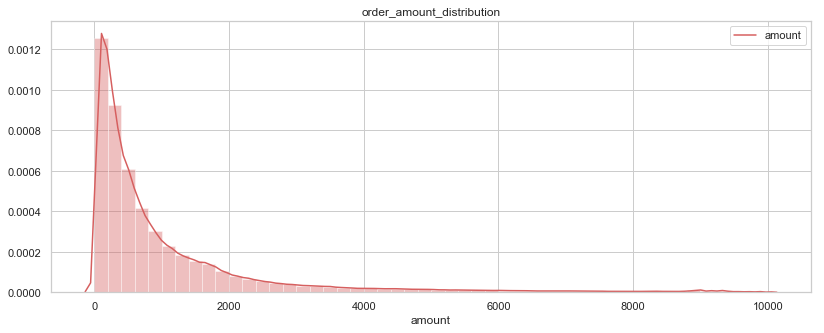

In [89]:
#1w以内的金额分布
common = order.loc[order['amount'] <= 10000]
fig = plt.figure(facecolor='white',figsize=(30,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(common.amount,kde_kws={"label":"amount"},color="r",ax=ax1)
ax1.set_title(label='order_amount_distribution', loc='center')

# ax2 = fig.add_subplot(1,2,2)
# sns.kdeplot(common.amount,cumulative=True,label="amount",color="r",ax=ax2)
# ax2.set_title(label='cumulative',loc='center')


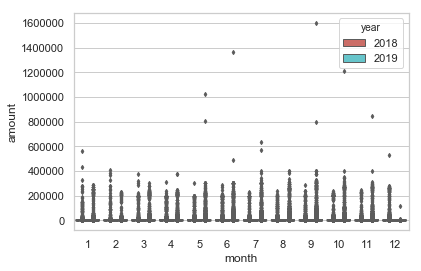

In [90]:
#每月单笔金额分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order,
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

# 添加散点图
# sns.swarmplot(x="month", y="amount", data=order,color ='k',size = 3,alpha = 0.8)

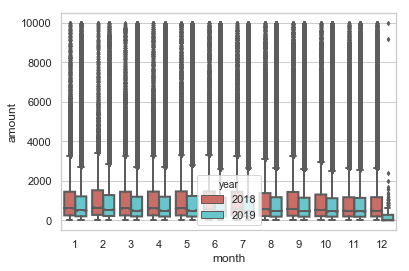

In [91]:
#观察1w以下的每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] <= 10000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

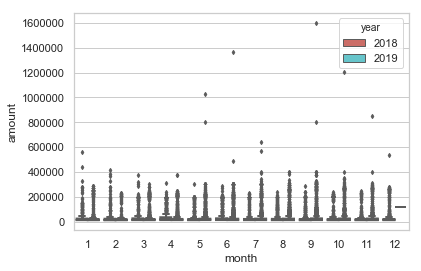

In [92]:
#观察1w以上的每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 10000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

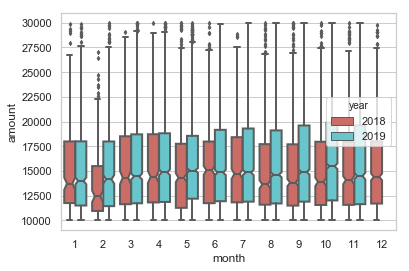

In [94]:
#观察1w以上3w以下，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[(order['amount'] > 10000)&(order['amount'] <= 30000)],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

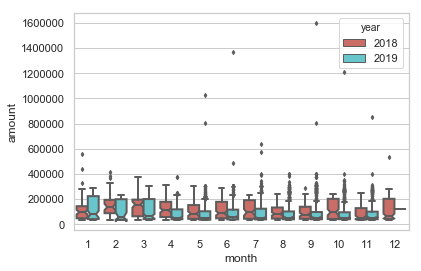

In [95]:
#观察3w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 30000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

In [ ]:
# 由上观察，90%的单笔订单都集中在1w甚至是1000以内，1w-3w内分布比较均匀，3w以上的大额订单基本在20w以内

## 单日金额分布

In [ ]:
#考虑到一个维修厂每日会多次下单来做备货或者处理事故，因此把每个维修厂每天的汇总采购金额作为最细颗粒）

In [97]:
sql = '''
SELECT t1.`COMPANY_ID`
      ,DATE(t1.created_stamp) AS date
      ,DATE_FORMAT(t1.created_stamp,'%%Y-%%m') as yymm
      ,MONTH(DATE(t1.created_stamp)) as month
      ,YEAR(DATE(t1.created_stamp)) as year
      ,sum(t2.`ACTUAL_CURRENCY_AMOUNT`) as amount
FROM ofbiz.order_header t1
JOIN ofbiz.order_payment t2
ON t1.ORDER_ID = t2.ORDER_ID
JOIN ec_admin.PARTY_GROUP_GEO t3
ON t1.company_id = t3.party_id
LEFT JOIN ec_admin.party_group t4
ON t1.company_id = t4.id
WHERE t2.actual_currency_amount >= 0.01
AND t2.actual_currency_amount<=6000000
AND t1.company_id NOT IN ("ZDQL7blRgcYkehvzLJx","qV80ZU26BkEvQCjNeyG","PQVDbTECtqtL9RU3LM1","ojqQZRmNiaXqwaxQpnL",
"lKe1gf5KsQF2Qvr7lqa","k48dr6BDLfB1kk65HZl","4UT4HuPaG2MZPa440GU")
AND t1.product_store_id NOT IN ("XMHYSX01","TSJWL001","GZCDSX01","GZBSSX01","GZLRH001")
AND t1.created_stamp >= "2018-01-01"
AND t1.created_stamp <= "2019-12-31"
AND t1.status_id IN ("ORDER_APPROVED","ORDER_COMPLETED") 
group by t1.`COMPANY_ID`
,DATE(t1.created_stamp)
,DATE_FORMAT(t1.created_stamp,'%%Y-%%m')
,MONTH(DATE(t1.created_stamp))
,YEAR(DATE(t1.created_stamp)) 
'''
order = get_sql(sql,engine)

(812182, 6)
Index([u'COMPANY_ID', u'date', u'yymm', u'month', u'year', u'amount'], dtype='object')


In [98]:
order.sort_values(by=['amount'],ascending=False)

COMPANY_ID        date     yymm  month  year        amount
122148                15393  2018-12-26  2018-12     12  2018 3999125.00000
269899  6v94uVlPZbFGWHegZJV  2018-11-28  2018-11     11  2018 3996503.00000
122147                15393  2018-10-26  2018-10     10  2018 3996176.00000
269898  6v94uVlPZbFGWHegZJV  2018-09-26  2018-09      9  2018 3993416.00000
175411                18859  2018-06-04  2018-06      6  2018 3010117.00000
269909  6v94uVlPZbFGWHegZJV  2019-07-23  2019-07      7  2019 2999359.00000
269894  6v94uVlPZbFGWHegZJV  2018-05-19  2018-05      5  2018 2999108.00000
182632                19093  2018-12-01  2018-12     12  2018 2998676.00000
175413                18859  2018-08-14  2018-08      8  2018 2998181.00000
182631                19093  2018-10-24  2018-10     10  2018 2997989.00000
175415                18859  2018-10-09  2018-10     10  2018 2996482.00000
122155                15393  2019-06-28  2019-06      6  2019 2995821.00000
122146                15393  2018-09-25  2018-09      9  2018 2995775.00000
175416                18859  2018-12-01  2018-12     12  2018 2994150.00000
182630                19093  2018-08-13  2018-08      8  2018 2993891.00000
122144                15393  2018-06-15  2018-06      6  2018 2992484.00000
269897  6v94uVlPZbFGWHegZJV  2018-07-07  2018-07      7  2018 2990185.00000
122145                15393  2018-07-07  2018-07      7  2018 2985608.00000
269891  6v94uVlPZbFGWHegZJV  2018-02-03  2018-02      2  2018 2900176.00000
122139                15393  2018-03-22  2018-03      3  2018 2895042.00000
269893  6v94uVlPZbFGWHegZJV  2018-04-26  2018-04      4  2018 2892359.00000
269892  6v94uVlPZbFGWHegZJV  2018-03-22  2018-03      3  2018 2869737.00000
182629                19093  2018-06-02  2018-06      6  2018 2656717.00000
122161                15393  2019-11-21  2019-11     11  2019 1999996.00000
175430                18859  2019-10-22  2019-10     10  2019 1999993.00000
182644                19093  2019-10-23  2019-10     10  2019 1999981.00000
269913  6v94uVlPZbFGWHegZJV  2019-10-26  2019-10     10  2019 1999975.00000
182645                19093  2019-11-20  2019-11     11  2019 1999955.00000
175419                18859  2019-03-01  2019-03      3  2019 1999955.00000
269914  6v94uVlPZbFGWHegZJV  2019-11-19  2019-11     11  2019 1999944.00000
122160                15393  2019-10-19  2019-10     10  2019 1999939.00000
175431                18859  2019-11-16  2019-11     11  2019 1999924.00000
175428                18859  2019-08-21  2019-08      8  2019 1999920.00000
527519  kxsFGJaPpsY8Nf1nOBQ  2019-09-26  2019-09      9  2019 1999903.00000
269901  6v94uVlPZbFGWHegZJV  2019-01-24  2019-01      1  2019 1999901.00000
527520  kxsFGJaPpsY8Nf1nOBQ  2019-10-24  2019-10     10  2019 1999858.00000
182636                19093  2019-04-24  2019-04      4  2019 1999858.00000
527517  kxsFGJaPpsY8Nf1nOBQ  2019-07-29  2019-07      7  2019 1999847.00000
182640                19093  2019-07-22  2019-07      7  2019 1999786.00000
269900  6v94uVlPZbFGWHegZJV  2019-01-02  2019-01      1  2019 1999772.00000
527516  kxsFGJaPpsY8Nf1nOBQ  2019-06-28  2019-06      6  2019 1999764.00000
175429                18859  2019-09-18  2019-09      9  2019 1999733.00000
122157                15393  2019-08-28  2019-08      8  2019 1999601.00000
269904  6v94uVlPZbFGWHegZJV  2019-03-14  2019-03      3  2019 1999464.00000
175423                18859  2019-05-22  2019-05      5  2019 1999249.00000
182633                19093  2019-01-02  2019-01      1  2019 1999211.00000
182641                19093  2019-08-26  2019-08      8  2019 1999182.00000
175418                18859  2019-01-24  2019-01      1  2019 1998872.00000
122153                15393  2019-05-21  2019-05      5  2019 1998860.00000
182637                19093  2019-04-26  2019-04      4  2019 1998817.00000
269910  6v94uVlPZbFGWHegZJV  2019-08-21  2019-08      8  2019 1998708.00000
122149                15393  2019-02-26  2019-02      2  2019 199

In [105]:
order['tag'] = order['amount'].apply(lambda x: '0-10000' if x <= 10000 else
                                                '10000-20000' if x <= 20000 else 
                                                '20000以上')
order 

COMPANY_ID        date     yymm  month  year      amount  \
0       005cn10dakWDE8jO4Ii  2019-05-13  2019-05      5  2019    64.95000   
1       007IOQO2XAgYAb8bSK6  2018-11-30  2018-11     11  2018    23.83000   
2       007IOQO2XAgYAb8bSK6  2018-12-27  2018-12     12  2018 14307.20000   
3       007IOQO2XAgYAb8bSK6  2018-12-28  2018-12     12  2018    20.11000   
4       007IOQO2XAgYAb8bSK6  2019-01-02  2019-01      1  2019   425.12000   
5       007IOQO2XAgYAb8bSK6  2019-01-05  2019-01      1  2019  1841.60000   
6       007IOQO2XAgYAb8bSK6  2019-01-10  2019-01      1  2019   888.48000   
7       007IOQO2XAgYAb8bSK6  2019-01-11  2019-01      1  2019  1173.32000   
8       007IOQO2XAgYAb8bSK6  2019-01-12  2019-01      1  2019   145.00000   
9       007IOQO2XAgYAb8bSK6  2019-01-14  2019-01      1  2019   118.00000   
10      007IOQO2XAgYAb8bSK6  2019-01-16  2019-01      1  2019   706.72000   
11      007IOQO2XAgYAb8bSK6  2019-05-17  2019-05      5  2019    20.00000   
12      007IOQO2XAgYAb8bSK6  2019-05-25  2019-05      5  2019   937.20000   
13      007IOQO2XAgYAb8bSK6  2019-06-13  2019-06      6  2019   237.96000   
14      00DUvW5UNUmiHGVLG6z  2019-07-20  2019-07      7  2019  2280.00000   
15      00DUvW5UNUmiHGVLG6z  2019-07-21  2019-07      7  2019  8934.00000   
16      00DUvW5UNUmiHGVLG6z  2019-07-23  2019-07      7  2019   129.00000   
17      00DUvW5UNUmiHGVLG6z  2019-08-04  2019-08      8  2019   413.00000   
18      00DUvW5UNUmiHGVLG6z  2019-08-06  2019-08      8  2019  2816.00000   
19      00DUvW5UNUmiHGVLG6z  2019-08-08  2019-08      8  2019   285.00000   
20      00DUvW5UNUmiHGVLG6z  2019-08-13  2019-08      8  2019   308.00000   
21      00DUvW5UNUmiHGVLG6z  2019-08-14  2019-08      8  2019  1004.00000   
22      00DUvW5UNUmiHGVLG6z  2019-08-15  2019-08      8  2019   229.00000   
23      00DUvW5UNUmiHGVLG6z  2019-08-17  2019-08      8  2019  3567.00000   
24      00DUvW5UNUmiHGVLG6z  2019-08-20  2019-08      8  2019  3643.00000   
25      00DUvW5UNUmiHGVLG6z  2019-08-21  2019-08      8  2019    50.00000   
26      00DUvW5UNUmiHGVLG6z  2019-08-22  2019-08      8  2019   846.00000   
27      00DUvW5UNUmiHGVLG6z  2019-08-26  2019-08      8  2019   463.00000   
28      00DUvW5UNUmiHGVLG6z  2019-08-30  2019-08      8  2019   353.23000   
29      00DUvW5UNUmiHGVLG6z  2019-09-05  2019-09      9  2019   407.95000   
30      00DUvW5UNUmiHGVLG6z  2019-09-06  2019-09      9  2019   611.93000   
31      00DUvW5UNUmiHGVLG6z  2019-09-11  2019-09      9  2019  2751.18000   
32      00DUvW5UNUmiHGVLG6z  2019-09-12  2019-09      9  2019   129.35000   
33      00DUvW5UNUmiHGVLG6z  2019-09-15  2019-09      9  2019  1741.25000   
34      00DUvW5UNUmiHGVLG6z  2019-09-16  2019-09      9  2019   472.63000   
35      00DUvW5UNUmiHGVLG6z  2019-09-18  2019-09      9  2019   368.16000   
36      00DUvW5UNUmiHGVLG6z  2019-09-19  2019-09      9  2019   218.90000   
37      00DUvW5UNUmiHGVLG6z  2019-09-20  2019-09      9  2019   497.50000   
38      00DUvW5UNUmiHGVLG6z  2019-09-21  2019-09      9  2019   661.68000   
39      00DUvW5UNUmiHGVLG6z  2019-09-22  2019-09      9  2019   323.38000   
40      00DUvW5UNUmiHGVLG6z  2019-09-23  2019-09      9  2019    44.78000   
41      00DUvW5UNUmiHGVLG6z  2019-09-26  2019-09      9  2019    74.63000   
42      00DUvW5UNUmiHGVLG6z  2019-09-27  2019-09      9  2019   223.60000   
43      00DUvW5UNUmiHGVLG6z  2019-10-06  2019-10     10  2019  3334.25000   
44      00DUvW5UNUmiHGVLG6z  2019-10-07  2019-10     10  2019   636.80000   
45      00DUvW5UNUmiHGVLG6z  2019-10-09  2019-10     10  2019   646.75000   
46      00DUvW5UNUmiHGVLG6z  2019-10-15  2019-10     10  2019  2368.10000   
47      00DUvW5UNUmiHGVLG6z  2019-10-16  2019-10     10  2019  1268.63000   
48      00DUvW5UNUmiHGVLG6z  2019-10-17  2019-10     10  2019  3597.18000   
49      00DUvW5UNUmiHGVLG6z  2019-10-18  2019-10     10  2019  4651.53000   
50      00DUvW5UNUmiHGVLG6z  2019-10-19  2019-10     10  2019   298.50000   
51      00DUv

Text(0.5,1,'order_amount_distribution')

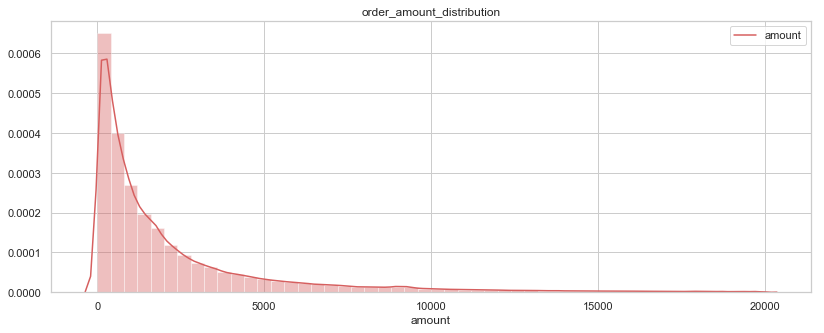

In [104]:
#金额分布
common = order.loc[order['amount'] <= 20000]
fig = plt.figure(facecolor='white',figsize=(30,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(common.amount,kde_kws={"label":"amount"},color="r",ax=ax1)
ax1.set_title(label='order_amount_distribution', loc='center')

# ax2 = fig.add_subplot(1,2,2)
# sns.kdeplot(common.amount,cumulative=True,label="amount",color="r",ax=ax2)
# ax2.set_title(label='cumulative',loc='center')


In [108]:
freq = pd.DataFrame(order.groupby('tag')['COMPANY_ID'].count())
freq['percentage'] = freq['COMPANY_ID']/len(order)
freq = freq.rename(columns={'COMPANY_ID':'count'}) 
freq

count  percentage
tag                            
0-10000      768489     0.94620
10000-20000   30013     0.03695
20000以上       13680     0.01684

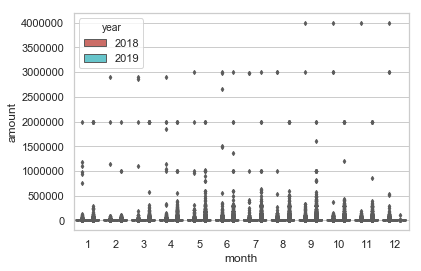

In [106]:
#每月金额分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order,
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

# 添加散点图
# sns.swarmplot(x="month", y="amount", data=order,color ='k',size = 3,alpha = 0.8)

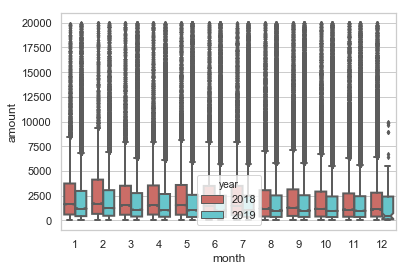

In [109]:
#观察2w以下，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] <= 20000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

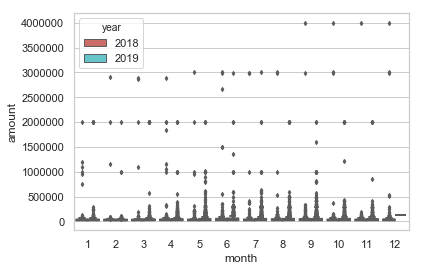

In [110]:
#观察2w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 20000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

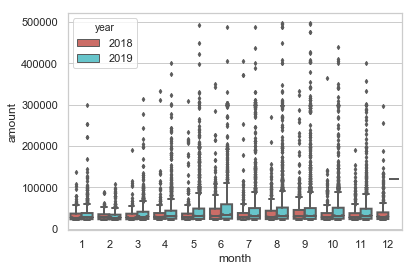

In [111]:
#观察2w以上50w以下，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[(order['amount'] > 20000)&(order['amount'] <= 500000)],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

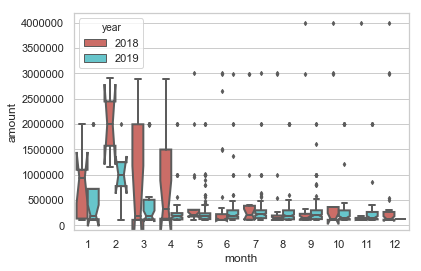

In [112]:
#观察10w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 100000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

## 询价单与采购单字段匹配

In [11]:
sql = '''
SELECT e.shopping_list_id
      ,e.car_brand_name
      ,DATE(e.created_stamp) AS date
      ,DATE_FORMAT(e.created_stamp,'%%Y-%%m') as yymm
      ,MONTH(DATE(e.created_stamp)) as month
      ,YEAR(DATE(e.created_stamp)) as year
      ,sum(t2.`ACTUAL_CURRENCY_AMOUNT`) as amount
FROM ofbiz.order_header t1
JOIN ofbiz.order_payment t2
ON t1.ORDER_ID = t2.ORDER_ID

join ec_agentbuy.shopping_list e
on t1.shopping_list_id = e.shopping_list_id
and e.garage_company_id NOT IN ("ZDQL7blRgcYkehvzLJx","qV80ZU26BkEvQCjNeyG","PQVDbTECtqtL9RU3LM1","ojqQZRmNiaXqwaxQpnL",
"lKe1gf5KsQF2Qvr7lqa","k48dr6BDLfB1kk65HZl","4UT4HuPaG2MZPa440GU")
AND LENGTH(e.vin) IN (7,17,10,11,12,13,14) 
and e.created_stamp >= "2018-01-01" and e.created_stamp <= "2019-12-31"
JOIN ec_admin.PARTY_GROUP_GEO t3
ON t1.company_id = t3.party_id
LEFT JOIN ec_admin.party_group t4
ON t1.company_id = t4.id
WHERE t2.actual_currency_amount >= 0.01
AND t2.actual_currency_amount<=6000000
AND t1.company_id NOT IN ("ZDQL7blRgcYkehvzLJx","qV80ZU26BkEvQCjNeyG","PQVDbTECtqtL9RU3LM1","ojqQZRmNiaXqwaxQpnL",
"lKe1gf5KsQF2Qvr7lqa","k48dr6BDLfB1kk65HZl","4UT4HuPaG2MZPa440GU")
AND t1.product_store_id NOT IN ("XMHYSX01","TSJWL001","GZCDSX01","GZBSSX01","GZLRH001")
AND t1.status_id IN ("ORDER_APPROVED","ORDER_COMPLETED") 
group by e.shopping_list_id
      ,e.car_brand_name
      ,DATE(e.created_stamp) 
      ,DATE_FORMAT(e.created_stamp,'%%Y-%%m')
      ,MONTH(DATE(e.created_stamp))
      ,YEAR(DATE(e.created_stamp)) 
'''
order = get_sql(sql,engine)

(1357681, 7)
Index([u'shopping_list_id', u'car_brand_name', u'date', u'yymm', u'month',
       u'year', u'amount'],
      dtype='object')


In [12]:
order.describe()

month          year        amount
count 1357681.00000 1357681.00000 1357681.00000
mean        7.65157    2018.77429    1493.82445
std         3.30431       0.41805    4586.59879
min         1.00000    2018.00000       0.01000
25%         5.00000    2019.00000     235.40000
50%         8.00000    2019.00000     594.00000
75%        11.00000    2019.00000    1479.76000
max        12.00000    2019.00000  571536.00000

Text(0.5,1,'order_amount_distribution')

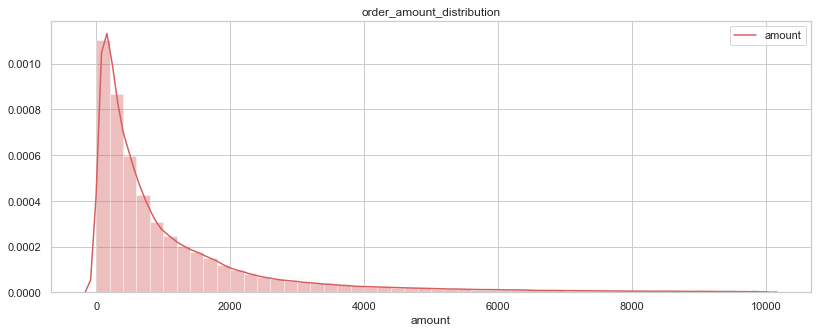

In [14]:
#金额分布
common = order.loc[order['amount'] <= 10000]
fig = plt.figure(facecolor='white',figsize=(30,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(common.amount,kde_kws={"label":"amount"},color="r",ax=ax1)
ax1.set_title(label='order_amount_distribution', loc='center')

# ax2 = fig.add_subplot(1,2,2)
# sns.kdeplot(common.amount,cumulative=True,label="amount",color="r",ax=ax2)
# ax2.set_title(label='cumulative',loc='center')


In [15]:
order['tag'] = order['amount'].apply(lambda x: '0-10000' if x <= 10000 else
                                                '10000-20000' if x <= 20000 else 
                                                '20000以上')
order 

shopping_list_id car_brand_name        date     yymm  month  year  \
0           B18010100333             奔驰  2018-01-01  2018-01      1  2018   
1           B18010100814             奥迪  2018-01-01  2018-01      1  2018   
2           B18010100896             奔驰  2018-01-01  2018-01      1  2018   
3           B18010101817             奔驰  2018-01-01  2018-01      1  2018   
4           B18010101839             宝马  2018-01-01  2018-01      1  2018   
5           B18010102114             路虎  2018-01-01  2018-01      1  2018   
6           B18010102173             奔驰  2018-01-01  2018-01      1  2018   
7           B18010102426            保时捷  2018-01-01  2018-01      1  2018   
8           B18010103150             奥迪  2018-01-01  2018-01      1  2018   
9           B18010103268             路虎  2018-01-01  2018-01      1  2018   
10          B18010103561             奥迪  2018-01-01  2018-01      1  2018   
11          B18010103761             宝马  2018-01-01  2018-01      1  2018   
12          B18010103891             路虎  2018-01-01  2018-01      1  2018   
13          B18010103941           雷克萨斯  2018-01-01  2018-01      1  2018   
14          B18010104056             奔驰  2018-01-01  2018-01      1  2018   
15          B18010104221             宝马  2018-01-01  2018-01      1  2018   
16          B18010105082             宝马  2018-01-01  2018-01      1  2018   
17          B18010105752             宝马  2018-01-01  2018-01      1  2018   
18          B18010105868             宝马  2018-01-01  2018-01      1  2018   
19          B18010106414             路虎  2018-01-01  2018-01      1  2018   
20          B18010106700             宝马  2018-01-01  2018-01      1  2018   
21          B18010106779             奔驰  2018-01-01  2018-01      1  2018   
22          B18010107463             宝马  2018-01-01  2018-01      1  2018   
23          B18010107811             宝马  2018-01-01  2018-01      1  2018   
24          B18010107957             路虎  2018-01-01  2018-01      1  2018   
25          B18010108007             宝马  2018-01-01  2018-01      1  2018   
26          B18010109303             奥迪  2018-01-01  2018-01      1  2018   
27          B18010109326             奔驰  2018-01-01  2018-01      1  2018   
28          B18010109459             宝马  2018-01-01  2018-01      1  2018   
29          B18010109555             宝马  2018-01-01  2018-01      1  2018   
30          B18010109642             奥迪  2018-01-01  2018-01      1  2018   
31          B18010200015             奔驰  2018-01-02  2018-01      1  2018   
32          B18010200019             奔驰  2018-01-02  2018-01      1  2018   
33          B18010200044             宝马  2018-01-02  2018-01      1  2018   
34          B18010200088             奔驰  2018-01-02  2018-01      1  2018   
35          B18010200125             宝马  2018-01-02  2018-01      1  2018   
36          B18010200143             奥迪  2018-01-02  2018-01      1  2018   
37          B18010200152             路虎  2018-01-02  2018-01      1  2018   
38          B18010200166             宝马  2018-01-02  2018-01      1  2018   
39          B18010200196             奥迪  2018-01-02  2018-01      1  2018   
40          B18010200203             路虎  2018-01-02  2018-01      1  2018   
41          B18010200239             奔驰  2018-01-02  2018-01      1  2018   
42          B18010200253             奥迪  2018-01-02  2018-01      1  2018   
43          B18010200284             奔驰  2018-01-02  2018-01      1  2018   
44          B18010200311            保时捷  2018-01-02  2018-01      1  2018   
45          B18010200320             奔驰  2018-01-02  2018-01      1  2018   
46          B18010200324             奔驰  2018-01-02  2018-01      1  2018   
47          B18010200330             宝马  2018-01-02  2018-01      1  2018   
48          B18010200340             奥迪  2018-01-02  2018-01      1  2018   
49          B18010200351             大众  2018-01-02  2018-01      1  2018   
50          B18010200380             宝马  2018-01-02  2018-01      1  2018   
51  

In [16]:
freq = pd.DataFrame(order.groupby('tag')['shopping_list_id'].count())
freq['percentage'] = freq['shopping_list_id']/len(order)
freq = freq.rename(columns={'shopping_list_id':'count'}) 
freq

count  percentage
tag                             
0-10000      1335171     0.98342
10000-20000    15638     0.01152
20000以上         6872     0.00506

In [18]:
brand = pd.DataFrame(order.groupby('car_brand_name')['shopping_list_id'].count())
brand['percentage'] = brand['shopping_list_id']/len(order)
brand = brand.rename(columns={'shopping_list_id':'count'}) 
brand

count  percentage
car_brand_name                    
                   266     0.00020
一汽奔腾                 5     0.00000
三菱                2047     0.00151
中华                   1     0.00000
丰田               47287     0.03483
之诺                   2     0.00000
保时捷              72489     0.05339
克莱斯勒               437     0.00032
兰博基尼               242     0.00018
其他车型                81     0.00006
凯迪拉克             12813     0.00944
别克               20045     0.01476
劳斯莱斯               535     0.00039
吉普                3241     0.00239
名爵                   1     0.00000
大众               87380     0.06436
奔驰              286505     0.21103
奥迪              159742     0.11766
宝马              357835     0.26356
宝马/MINI             15     0.00001
宝马MINI             126     0.00009
宾利                3933     0.00290
捷豹               20349     0.01499
斯巴鲁               1253     0.00092
斯柯达               3545     0.00261
日产               22746     0.01675
本田               28182     0.02076
林肯                 756     0.00056
标致                2885     0.00212
沃尔沃              26363     0.01942
法拉利                542     0.00040
猎豹                 301     0.00022
玛莎拉蒂              9930     0.00731
现代                8818     0.00649
福特               11154     0.00822
纳智捷                  1     0.00000
英菲尼迪              2444     0.00180
荣威                   5     0.00000
讴歌                 908     0.00067
起亚                4744     0.00349
路虎              120153     0.08850
进口大众                11     0.00001
迷你               10848     0.00799
道奇                  39     0.00003
钧天                   7     0.00001
雪佛兰               6034     0.00444
雪铁龙               1838     0.00135
雷克萨斯             14680     0.01081
雷诺                 717     0.00053
马自达               3400     0.00250

In [19]:
pivot = pd.DataFrame(order.groupby(['car_brand_name','tag'])['shopping_list_id'].count())
# pivot['percentage'] = pivot['shopping_list_id']/len(order)
# pivot = brand.rename(columns={'shopping_list_id':'count'}) 
pivot

shopping_list_id
car_brand_name tag                          
               0-10000                   265
               10000-20000                 1
一汽奔腾           0-10000                     5
三菱             0-10000                  2002
               10000-20000                29
               20000以上                    16
中华             0-10000                     1
丰田             0-10000                 46961
               10000-20000               247
               20000以上                    79
之诺             0-10000                     2
保时捷            0-10000                 70360
               10000-20000              1522
               20000以上                   607
克莱斯勒           0-10000                   434
               10000-20000                 1
               20000以上                     2
兰博基尼           0-10000                   219
               10000-20000                10
               20000以上                    13
其他车型           0-10000                    81
凯迪拉克           0-10000                 12545
               10000-20000               195
               20000以上                    73
别克             0-10000                 19998
               10000-20000                35
               20000以上                    12
劳斯莱斯           0-10000                   451
               10000-20000                47
               20000以上                    37
吉普             0-10000                  3207
               10000-20000                23
               20000以上                    11
名爵             0-10000                     1
大众             0-10000                 86491
               10000-20000               668
               20000以上                   221
奔驰             0-10000                280527
               10000-20000              4308
               20000以上                  1670
奥迪             0-10000                157299
               10000-20000              1628
               20000以上                   815
宝马             0-10000                353348
               10000-20000              3151
               20000以上                  1336
宝马/MINI        0-10000                    15
宝马MINI         0-10000                   125
               10000-20000                 1
宾利             0-10000                  3388
               10000-20000               322
               20000以上                   223
捷豹             0-10000                 19903
               10000-20000               339
               20000以上                   107
斯巴鲁            0-10000                  1250
               10000-20000                 3
斯柯达            0-10000                  3534
               10000-20000                11
日产             0-10000                 22670
               10000-20000                50
               20000以上                    26
本田             0-10000                 28091
               10000-20000                66
               20000以上                    25
林肯             0-10000                   719
               10000-20000                23
               20000以上                    14
标致             0-10000                  2872
               10000-20000                11
               20000以上                     2
沃尔沃            0-10000                 26040
               10000-20000               242
               20000以上                    81
法拉利            0-10000                   486
               10000-20000                31
               20000以上                    25
猎豹             0-10000                   300
               10000-20000                 1
玛莎拉蒂           0-10000                  9500
               10000-20000               318
               20000以上                   112
现代             0-10000                  8584
               10000-20000                64
               20000以上                   170
福特             0-10000                 11066
               10000-20000                56
               20000以上 

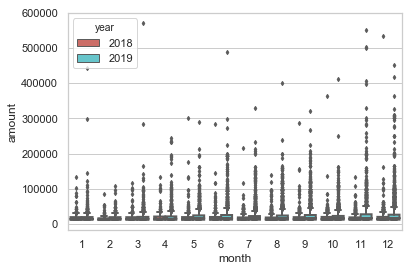

In [20]:
#观察1w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 10000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

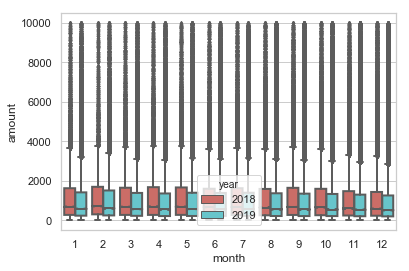

In [21]:
#观察1w以下，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] <= 10000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

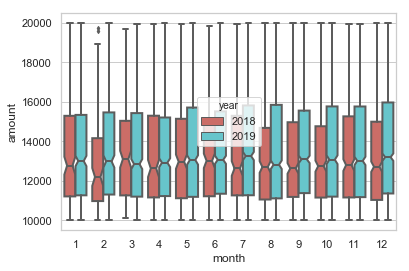

In [22]:
#观察1w-2w，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[(order['amount'] > 10000)&(order['amount'] <= 20000)],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

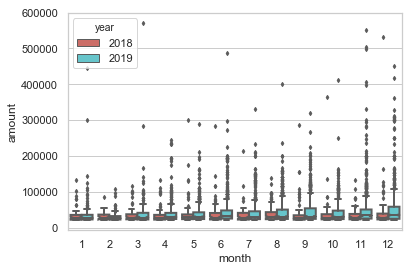

In [23]:
#观察2w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 20000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

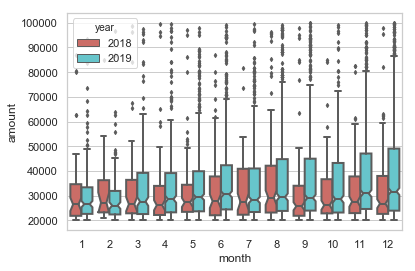

In [24]:
#观察2w-10w，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[(order['amount'] > 20000)&(order['amount'] <= 100000)],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )

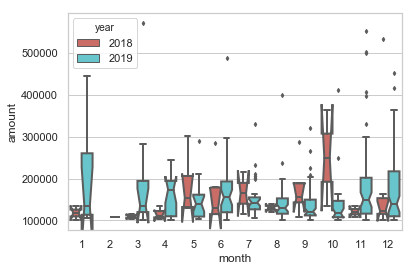

In [25]:
#观察10w以上，每个月的分布

# 箱型图
sns.boxplot(x="month", y="amount", hue='year',
            data=order.loc[order['amount'] > 100000],
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 3,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True    # 设置是否以中值做凹槽
#             order = ['Thur','Fri','Sat','Sun'],  # 筛选类别
           )